In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import rfe, RFE
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [ ]:
import cv2
img_band_1 = cv2.imread("/content/drive/My Drive/GIS_Cloud_Class/L71145043_04320010801_B10.TIF")
lables = cv2.imread("/content/drive/My Drive/GIS_Cloud_Class/p145_r43_3_mask_geo.tif")
img_band_1.shape

(7171, 8011, 3)

In [ ]:
img = cv2.resize(img_band_1, (0,0), fx = 0.05, fy=0.05)
lab = cv2.resize(lables, (0,0), fx = 0.05, fy=0.05)

In [ ]:
x = np.array(img)
x.shape

(359, 401, 3)

In [ ]:
y = np.array(lab)
y.shape

(359, 401, 3)

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
y = y[:,0]
print(x.shape)
print(y.shape)

(431877, 1)
(431877,)


In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 55)
print(x_train.shape)
print(y_train.shape)

(12928964, 1)
(12928964,)


In [ ]:
def XGBoost(X_train, y_train, X_test, y_test, objective):
    print("XGBoost::\n")
    xg = xgb.XGBClassifier(verbosity=1, objective=objective, random_state=42)
    xg.fit(X_train, y_train)
    print("Training Accuracy: ", xg.score(X_train, y_train))
    print("Test Score: ",xg.score(X_test, y_test))
    return xg

In [ ]:
def RandomForestClass(X_train, y_train, X_test=None, y_test=None):
    print("Random Forest::\n")
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    print("Training Score: ",lgr.score(X_train, y_train))
    print("Test Score: ",lgr.score(X_test, y_test))
    return rfc

In [ ]:
def KNearestNeigbors(X_train, y_train, X_test, y_test, n):
    print("knn k = ", n)
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    print("Training Accuracy: ", knn.score(X_train, y_train))
    print("Test Score: ",knn.score(X_test, y_test))
    return knn

In [ ]:
def SupportVectorMachine(X_train, y_train, X_test=None, y_test=None):
    print("Support Vector Classifier::\n")
    svc = SVC(kernel = 'linear')
    svc.fit(X_train, y_train)
    print("Training Accuracy: ", svc.score(X_train, y_train))
    print("Test Score: ",svc.score(X_test, y_test))
    return svc

In [ ]:
def LogisticRegr(X_train, y_train, X_test=None, y_test=None):
    print("Logistic Regression::\n")
    lgr = LogisticRegression(max_iter=1200)
    lgr.fit(X_train, y_train)
    print("Training Score: ",lgr.score(X_train, y_train))
    print("Test Score: ",lgr.score(X_test, y_test))
    return lgr

In [ ]:
lgr = LogisticRegr(x_train, y_train, x_test, y_test)
outfile = open("lgr_model",'wb')
pickle.dump(lgr,outfile)
outfile.close()

Logistic Regression::

Training Score:  0.7114762702314704
Test Score:  0.7151637039634288


In [ ]:
print(np.unique(y).size)

11


In [ ]:
knn = KNearestNeigbors(x_train, y_train, x_test, y_test, np.unique(y).size)
outfile = open("knn_model",'wb')
pickle.dump(knn,outfile)
outfile.close()

knn k =  11
Training Accuracy:  0.8018107021294659
Test Score:  0.8012860800359891


In [ ]:
svm = SupportVectorMachine(x_train, y_train, x_test, y_test)
outfile = open("svm_model",'wb')
pickle.dump(svm,outfile)
outfile.close()

Support Vector Classifier::



In [ ]:
rfc = RandomForestClass(x_train, y_train, x_test, y_test)
outfile = open("rfc_model",'wb')
pickle.dump(rfc,outfile)
outfile.close()

Random Forest::

Training Score:  0.8163477754288743
Test Score:  0.8165703292646835


In [ ]:
xgb = XGBoost(x_train, y_train, x_test, y_test, 'binary:logistic')
outfile = open("xgb_model",'wb')
pickle.dump(xgb,outfile)
outfile.close()

XGBoost::

Training Accuracy:  0.731605473784954
Test Score:  0.7343225917423606


In [ ]:
infile = open("rfc_model",'rb')
rfc = pickle.load(infile)
infile.close()
infile = open("xgb_model",'rb')
xgb = pickle.load(infile)
infile.close()
infile = open("knn_model",'rb')
knn = pickle.load(infile)
infile.close()
infile = open("lgr_model",'rb')
lgr = pickle.load(infile)
infile.close()

In [ ]:
predicted_labels_lgr = lgr.predict(x)
predicted_labels_knn = knn.predict(x)
predicted_labels_xgb = xgb.predict(x)
predicted_labels_rfc = rfc.predict(x)

In [ ]:
#predicted_labels_svm = svm.predict(x)

In [ ]:
X = np.array(img_band_1)
X = X.reshape(-1,1)
X.shape

(172340643, 1)

In [ ]:
#predicted_labels_lgr = lgr.predict(x)
#predicted_labels_knn = knn.predict(x)

In [ ]:
# def get_mask(predicted_labels):
#     mask = img
#     length, width, depth = mask.shape
#     for i in range(length):
#         for j in range(width):
#             color = predicted_labels[width*j + i]
#             mask[i][j] = [color, color, color]
#     return mask

In [ ]:
lgr_mask = predicted_labels_lgr.reshape(lab.shape)
knn_mask = predicted_labels_knn.reshape(lab.shape)
rfc_mask = predicted_labels_rfc.reshape(lab.shape)
xgb_mask = predicted_labels_xgb.reshape(lab.shape)

#lgr_mask = get_mask(predicted_labels_lgr)
#knn_mask = get_mask(predicted_labels_knn)

In [ ]:
cv2.imwrite("/content/drive/My Drive/GIS_Cloud_Class/predicted_masks/original.jpg", lab)
cv2.imwrite("/content/drive/My Drive/GIS_Cloud_Class/predicted_masks/lgr_mask.jpg", lgr_mask)
cv2.imwrite("/content/drive/My Drive/GIS_Cloud_Class/predicted_masks/knn_mask.jpg", knn_mask)
cv2.imwrite("/content/drive/My Drive/GIS_Cloud_Class/predicted_masks/xgb_mask.jpg", xgb_mask)
cv2.imwrite("/content/drive/My Drive/GIS_Cloud_Class/predicted_masks/rfc_mask.jpg", rfc_mask)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

True

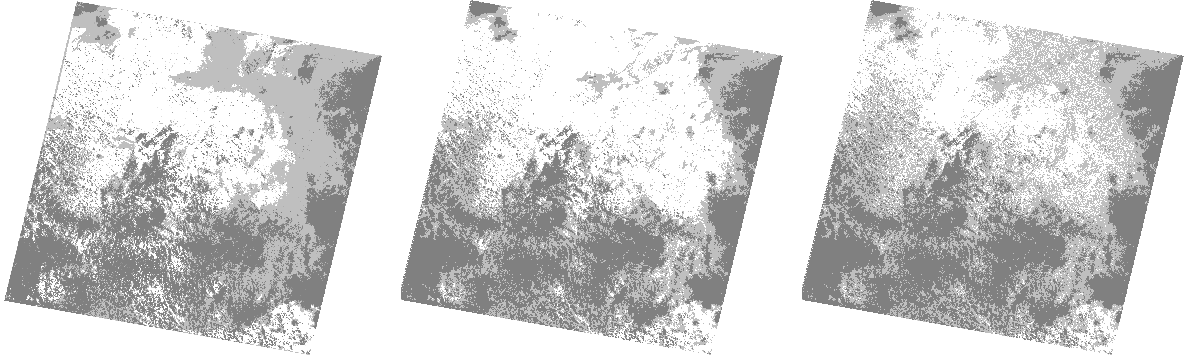

In [ ]:
combined = np.concatenate((lab, lgr_mask, knn_mask), axis=1)
cv2_imshow(combined)

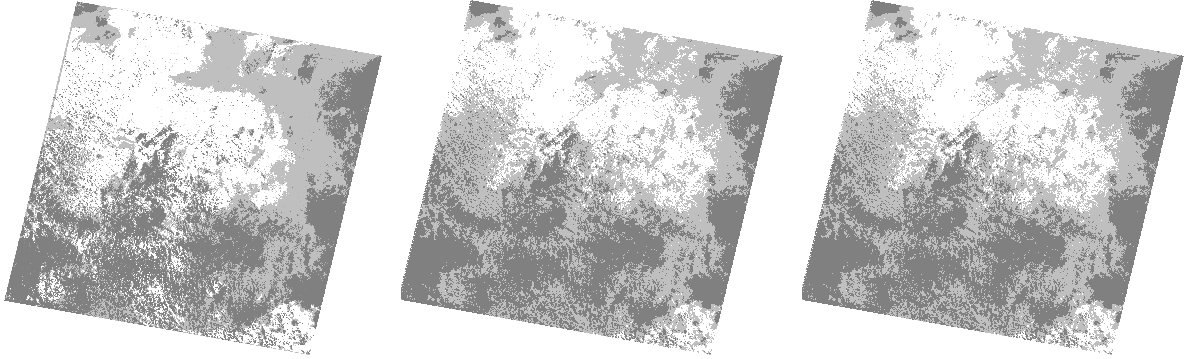

In [ ]:
combined2 = np.concatenate((lab, rfc_mask, xgb_mask),axis = 1)
cv2_imshow(combined2)